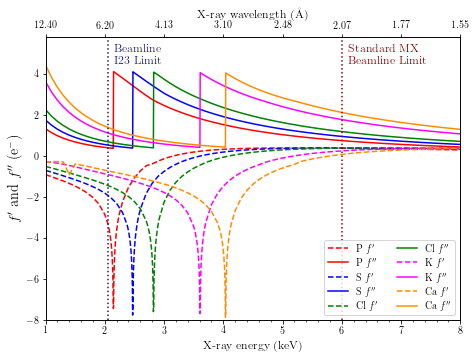

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.rcParams['font.size']=12
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='serif'

# Function to load data and filter based on the x-axis limit
def load_data(file_name, max_energy):
    data = np.loadtxt(file_name, usecols=(0, 1, 2))
    filtered_data = data[data[:, 0] <= max_energy]
    return filtered_data

# Function to convert energy (eV) to wavelength (Angstroms)
def energy_to_wavelength(energy):
    h = 4.135667696e-15  # Planck's constant in eV*s
    c = 299792458  # Speed of light in m/s
    wavelength = (h * c) / energy * 1e10  # Wavelength in Angstroms
    return wavelength

# Define element names and colors
elements = ['P', 'S', 'Cl', 'K', 'Ca']
colors = ['red', 'blue', 'green', 'magenta', 'darkorange']

# Create the plot
fig, ax1 = plt.subplots(figsize=(6.5, 4.875), layout="constrained") # 8, 6

max_energy = 9000  # Define the x-axis limit

for element, color in zip(elements, colors):
    data = load_data(f'/home/icf19162/CP5-Thesis/{element}.dat', max_energy = max_energy)
    energy, prime, double_prime = data[:, 0]*0.001, data[:, 1], data[:, 2] # convert eV to keV
    
    # Plotting prime and double_prime
    ax1.plot(energy, prime, linestyle='--', color=color, label=f"{element} $f'$")
    ax1.plot(energy, double_prime, linestyle='-', color=color, label=f"{element} $f''$")

# Customize the plot
ax1.set_xlabel('X-ray energy (keV)', size='large')
ax1.set_ylabel("$f'$ and $f''$ (e$^-$)", size='x-large')
ax1.legend(loc='best', ncols=2)
ax1.set_xlim(1, 8)  # Set x-axis limit
ax1.set_ylim(-8,5.8)

# Add vertical lines at specific energies
ax1.axvline(x=2.05, color='midnightblue', linestyle='dotted', label='Beamline I23 Limit')
ax1.axvline(x=6, color='darkred', linestyle='dotted', label='Standard MX Beamline Limit')

# Annotate the vertical lines
ax1.annotate('Beamline\nI23 Limit', xy=(2.1, 5), xytext=(2.15, 4.9),
             rotation=0, verticalalignment='center', color='midnightblue', fontsize='12')
ax1.annotate('Standard MX\nBeamline Limit', xy=(6, 5), xytext=(6.1, 4.9),
             rotation=0, verticalalignment='center', color='darkred', fontsize='12')
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())

# Create a second x-axis for wavelength
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
wavelength_ticks = energy_to_wavelength(np.array(ax1.get_xticks())*1000) # convert keV back to eV
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels([f'{wt:.2f}' for wt in wavelength_ticks])
ax2.set_xlabel('X-ray wavelength (Å)', size='large')
#fig.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/anomalous_scat_edges.pdf')
plt.savefig('/home/icf19162/CP5-Thesis/anomalous_scat_edges.png', dpi=300)

# Display the plot
plt.show()
